# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


In [4]:
import pandas as pd

<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [5]:
train, test = tf.keras.datasets.mnist.load_data('cs109b-mnist-mix.csv')
x_train, y_train = train
x_test, y_test = test
x_train = x_train/255
x_test = x_test/255

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


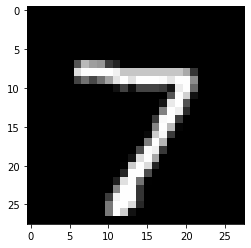

In [6]:
plt.imshow(x_test[0], cmap = 'gray');


**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [7]:
n_obs, height, width = x_train.shape
n_obs_test = x_test.shape[0]
x_train_reshape = x_train.reshape(n_obs, width*height)
x_test_reshape = x_test.reshape(n_obs_test, width*height)
pca = PCA(n_components = 2)
pca.fit(x_train_reshape)
pca_latent_train = pca.transform(x_train_reshape)
pca_latent_test = pca.transform(x_test_reshape)

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


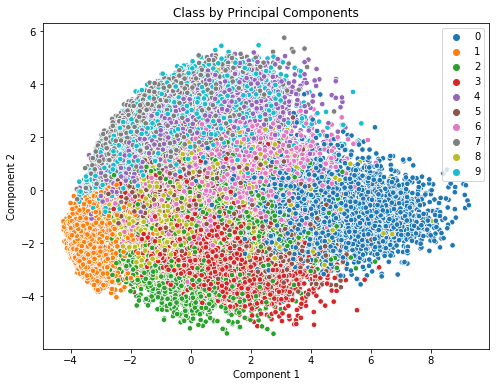

In [8]:
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10)) 

ax.set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by Principal Components');


**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [9]:
n_obs, input_dim = x_train_reshape.shape

# Encoder 
encoding_dim = 2
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear', use_bias=False)(input_layer)
linear_encoder = Model(input_layer, encoded, name='linear_encoder')

# Decoder
latent_input = Input(shape=(encoding_dim,))
decoded = Dense(input_dim, activation='linear', use_bias=False)(latent_input)
linear_decoder = Model(latent_input, decoded, name='linear_decoder')

# Autoencoder
lae = Sequential(name='lae')
lae.add(linear_encoder)
lae.add(linear_decoder)
lae.compile(loss='mse', optimizer=Adam(lr=0.0001))

print(linear_encoder.summary(), end = '\n\n\n')
print(linear_decoder.summary(), end = '\n\n\n')
print(lae.summary())

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None


Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None


Model: "la

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [10]:
epochs = 7
history = lae.fit(x = x_train_reshape, 
                  y = x_train_reshape,
                  validation_data = (x_test_reshape,x_test_reshape),
                  epochs = epochs,
                  batch_size = 32,
                  verbose = 2)
loss = history.history['loss']
val_loss = history.history['val_loss']


Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 - 5s - loss: 0.0715 - val_loss: 0.0632
Epoch 2/7
60000/60000 - 4s - loss: 0.0616 - val_loss: 0.0590
Epoch 3/7
60000/60000 - 4s - loss: 0.0581 - val_loss: 0.0578
Epoch 4/7
60000/60000 - 4s - loss: 0.0579 - val_loss: 0.0578
Epoch 5/7
60000/60000 - 4s - loss: 0.0578 - val_loss: 0.0578
Epoch 6/7
60000/60000 - 4s - loss: 0.0578 - val_loss: 0.0578
Epoch 7/7
60000/60000 - 4s - loss: 0.0578 - val_loss: 0.0578


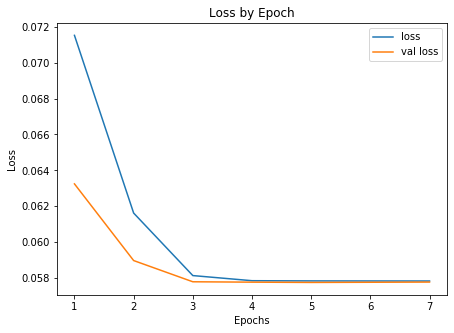

In [11]:
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(range(1, epochs+1), loss, label = 'loss')
sns.lineplot(range(1, epochs+1), val_loss, label = 'val loss')
ax.set(xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss by Epoch');


**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [12]:
lae_latent_train = linear_encoder(x_train_reshape).numpy()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



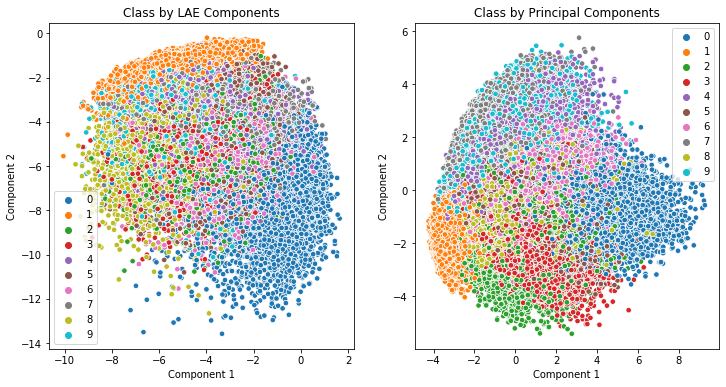

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.scatterplot(lae_latent_train[:,0],
                lae_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10),
                ax = ax[0])

sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10),
                ax = ax[1])
ax[0].set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by LAE Components');
ax[1].set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by Principal Components');


**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


The latent space representations in PCA and LAE are overall distinct in that the components used to represent each class are different (i.e., class 0 is represented over the domain of 0 to approximately 4 for component 1 and 4 to approximately 13 for component 2 in the PCA representation, while class 0 is represented over the domain 4 to approximately 8 for component 1 and -3 to approximately 3 for component 2 in the LAE representation). So, in general the components used to separate classes are different in the PCA and LAE representations. However, both the PCA and LAE representations separate certain classes well from the others (just do so in different ways). Specifically, both the PCA and LAE representations separate classes 0 and 1 fairly well from the rest of the data (blue and orange data points form contained clusters in each plot). 

Although overall neither PCA nor LAE clearly distinguish the classes well, PCA seems to do a slightly better job of separating more classes since the plot on the right shows more distinct clusters of colored data compared to the plot on the left. Specifically, classes 2 and 3 are distinct in the PCA representation while they are fairly admixed in the LAE representation. The poor classifications by PCA and LAE may be due to the data having nonlinear relationships contained in it such that nonlinear dimension reduction with another autoencoder would improve classification.

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


We would expect to see no difference in the reconstruction error after adding more dense layers (no bias) with only linear activations. This is because the model with these additional dense layers (no bias) with only linear activations do not capture non-linearity in the data and we already have a model that captures most of the linear relations in the data given that we observed a plateau in the loss (question 1.6). Having bias terms and having nonlinear activations would help to improve prediction (lower the reconstruction error) since it would allow nonlinear relationships in the data to be encoded.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [14]:
# Dimensions 
dim1 = 392
dim2 = 98
bottleneck_dim = 2

# Encoder 
e = Sequential()
e.add(Dense(dim1,  activation='relu', input_shape=(input_dim,)))
e.add(Dense(dim2,  activation='relu'))
e.add(Dense(bottleneck_dim, activation = 'linear', name = 'bottleneck'))
encoder = Model(e.input, e.get_layer('bottleneck').output, name = 'encoder')

# Decoder 
d = Sequential()
d.add(Dense(dim2,  activation='relu', input_shape=(bottleneck_dim,)))
d.add(Dense(dim1,  activation='relu'))
d.add(Dense(input_dim, activation = 'sigmoid', name = 'output'))
decoder = Model(d.input, d.get_layer('output').output, name = 'decoder')

# Autoencoder
ae = Sequential(name='ae')
ae.add(encoder)
ae.add(decoder)
ae.compile(loss='mse', optimizer=Adam(lr=0.0001))

# print
print(encoder.summary(), end = '\n\n\n')
print(decoder.summary(), end = '\n\n\n')
print(ae.summary())


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_3 (Dense)              (None, 98)                38514     
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 198       
Total params: 346,432
Trainable params: 346,432
Non-trainable params: 0
_________________________________________________________________
None


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4_input (InputLayer)   [(None, 2)]               0         
_____________________________

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [15]:
epochs = 15
history = ae.fit(x = x_train_reshape, 
                 y = x_train_reshape,
                 validation_data = (x_test_reshape,x_test_reshape),
                 epochs = epochs,
                 batch_size = 32,
                 verbose = 2)
loss = history.history['loss']
val_loss = history.history['val_loss']


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0629 - val_loss: 0.0536
Epoch 2/15
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0521 - val_loss: 0.0502
Epoch 3/15
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0494 - val_loss: 0.0482
Epoch 4/15
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0476 - val_loss: 0.0468
Epoch 5/15
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0462 - val_loss: 0.0456
Epoch 6/15
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0450 - val_loss: 0.0446
Epoch 7/15
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0442 - val_loss: 0.0440
Epoch 8/15
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0436 - val_loss: 0.0434
Epoch 9/15
60000/60000 [==============================] - 8s 135us/sample - loss: 0.04

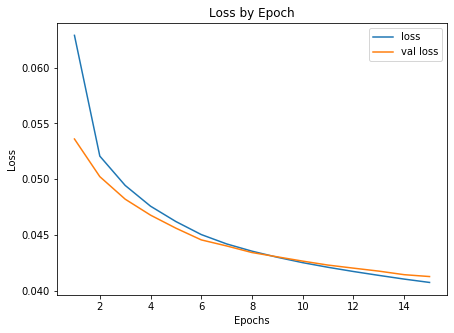

In [16]:
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(range(1, epochs+1), loss, label = 'loss')
sns.lineplot(range(1, epochs+1), val_loss, label = 'val loss')
ax.set(xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss by Epoch');


**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [17]:
ae_latent_train = encoder(x_train_reshape).numpy()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



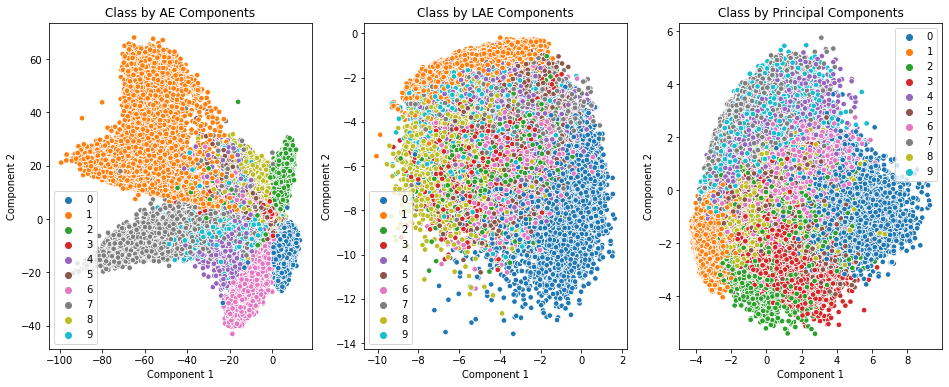

In [18]:
fig, ax = plt.subplots(1,3,figsize = (16,6))
sns.scatterplot(ae_latent_train[:,0],
                ae_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10),
                ax = ax[0])
sns.scatterplot(lae_latent_train[:,0],
                lae_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10),
                ax = ax[1])
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                hue = y_train.astype('str'),
                s = 30,
                palette = sns.color_palette(n_colors= 10),
                ax = ax[2])
ax[0].set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by AE Components')
ax[1].set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by LAE Components')
ax[2].set(xlabel = 'Component 1', ylabel = 'Component 2', title = 'Class by Principal Components');



The new autoencoder does a *much* better job of separating the classes compared to the previous LAE and PCA representations, as seen by the density of the points in the same class and the space between different classes. The scatterplots of ae_latent_train (far left), lae_latent_train (middle), and pca_latent_train (far right) all use different component values for representing the classes even for groups such as class 0 and 1 that are shown as distinct in each representation (e.g., the data for class 0 falls in a different space on the component 1 vs. component 2 space in all three plots). This indicates that the three methods separating the data after dimensionality reduction are representing the data differently. Therefore, the values of the components themselves may not be as meaningful as the overall success or failure of being able to distinguish classes.  

Overall we observe that the classes are distinguished quite well by the new AE, moderately well by PCA, and poorly by the previous LAE.

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [19]:
ae_recons_x_test = ae(x_test_reshape).numpy()
lae_recons_x_test = lae(x_test_reshape).numpy()
pca_recons_x_test = pca.inverse_transform(pca_latent_test)


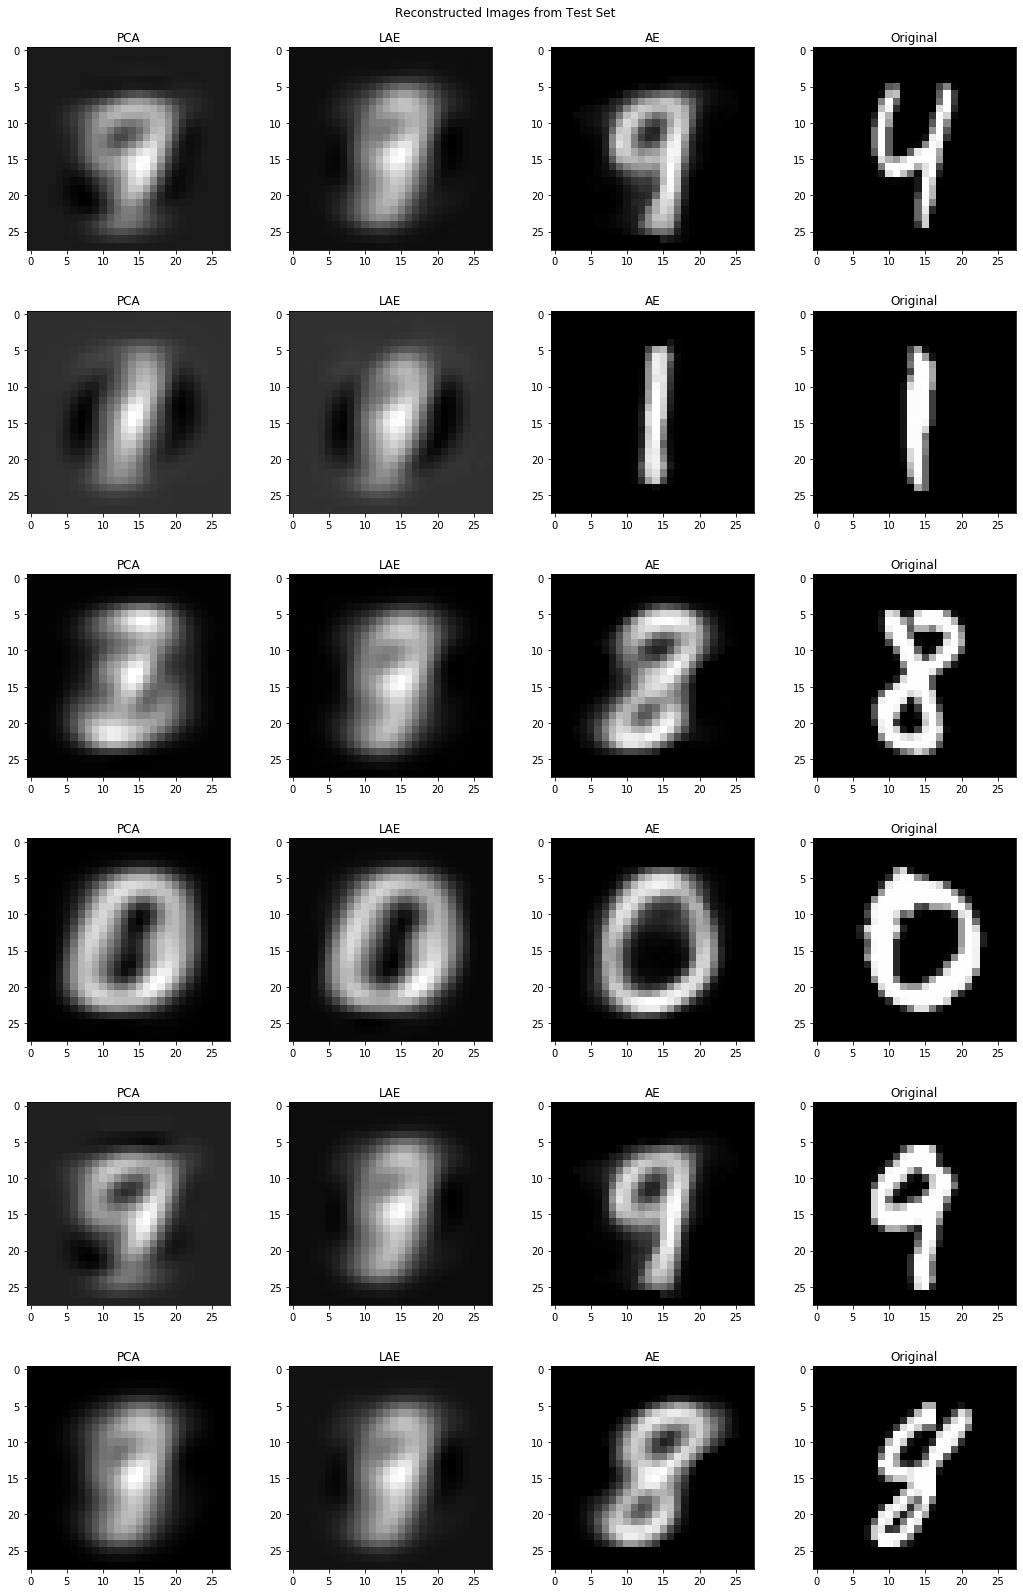

In [20]:
fig, ax = plt.subplots(6, 4, figsize = (18, 28))
titles = ['PCA','LAE','AE','Original']
reconstructions = [pca_recons_x_test, lae_recons_x_test, ae_recons_x_test, x_test_reshape]
np.random.seed(1103)
rand_ints = np.random.choice(range(n_obs_test), 6, replace = 0)
for row in range(6):
    for col in range(4):
        ax[row, col].set(title = titles[col])
        ax[row, col].imshow(reconstructions[col][rand_ints[row]].reshape(width, height), cmap = 'gray')

plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Reconstructed Images from Test Set', y = 0.9);

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [21]:
ae_mse = mean_squared_error(x_test_reshape, ae_recons_x_test)
lae_mse = mean_squared_error(x_test_reshape, lae_recons_x_test)
pca_mse = mean_squared_error(x_test_reshape, pca_recons_x_test)
print(f'Autoencoder MSE: {round(ae_mse, 3)},\nLinear Autoencoder MSE: {round(lae_mse, 3)},\nPCA MSE: {round(pca_mse, 3)}.')


Autoencoder MSE: 0.041,
Linear Autoencoder MSE: 0.058,
PCA MSE: 0.056.


The ordering does agree with our previous answers. The autoencoder does a much better job than the linear autoencoder and the PCA and the PCA does better than the LAE but only slightly, which we saw in 1.8.

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [39]:
x_cs109b = np.array(pd.read_csv('cs109b-mnist-mix.csv')/255).reshape(-1,28,28)

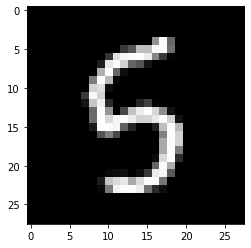

In [40]:
plt.imshow(x_cs109b[0], cmap = 'gray');

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [52]:
# Sizes
n_obs, height, width = x_cs109b.shape
nfilters1 = 16
nfilters2 = 8
kernel_size = (3,3)
pool_size = (2,2)
unsample_size = (2,2)
image_shape = (height, width, 1)

# Encoder
input_layer = Input(shape = image_shape)
x = Conv2D(nfilters1, kernel_size, activation = 'tanh', padding = 'same', name = 'conv1')(input_layer)
x = MaxPooling2D(pool_size, padding = 'same', name = 'pool1')(x)
x = Conv2D(nfilters2, kernel_size, activation = 'tanh', padding = 'same', name = 'conv2')(x)
x = MaxPooling2D(pool_size, padding = 'same', name = 'pool2')(x)
# Flatten
x = Flatten()(x)
x = Dense(8)(x)
x = Dense(196)(x)
x = Reshape((7,7,4))(x)
# Decoder
x = Conv2D(nfilters2, kernel_size, activation = 'tanh', padding = 'same', name = 'unconv2')(x)
x = UpSampling2D(unsample_size, name = 'unsample2')(x)
x = Conv2D(nfilters1, kernel_size, activation = 'tanh', padding = 'same', name = 'unconv1')(x)
x = UpSampling2D(unsample_size, name = 'unsample1')(x)
output_layer = Conv2D(1, kernel_size, activation = 'hard_sigmoid', padding = 'same', name = 'output')(x)
# Model
cae = Model(input_layer, output_layer, name = 'cae')
cae.summary()



Model: "cae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 8)         1160      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 3144    

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [53]:
loss = tf.keras.losses.mse
lr = 0.001
optimizer = Adam(learning_rate = lr) 
cae.compile(optimizer=optimizer, loss=loss) 

batch_size = 32
epochs = 7
x_train_4D = x_train.reshape(-1, height, width, 1)
x_test_4D = x_test.reshape(-1, height, width, 1)
history = cae.fit(x = x_train_4D,
                  y = x_train_4D,
                  validation_data = (x_test_4D, x_test_4D),
                  epochs = epochs,
                  batch_size = batch_size,
                  verbose = 2)




Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 - 13s - loss: 0.0392 - val_loss: 0.0294
Epoch 2/7
60000/60000 - 12s - loss: 0.0279 - val_loss: 0.0262
Epoch 3/7
60000/60000 - 12s - loss: 0.0258 - val_loss: 0.0250
Epoch 4/7
60000/60000 - 12s - loss: 0.0248 - val_loss: 0.0239
Epoch 5/7
60000/60000 - 12s - loss: 0.0241 - val_loss: 0.0234
Epoch 6/7
60000/60000 - 12s - loss: 0.0236 - val_loss: 0.0232
Epoch 7/7
60000/60000 - 12s - loss: 0.0233 - val_loss: 0.0227


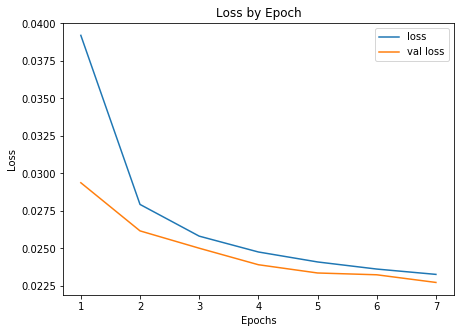

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(range(1, epochs+1), loss, label = 'loss')
sns.lineplot(range(1, epochs+1), val_loss, label = 'val loss')
ax.set(xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss by Epoch');

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [55]:
cae_recons_x_test = cae(x_test_4D).numpy()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



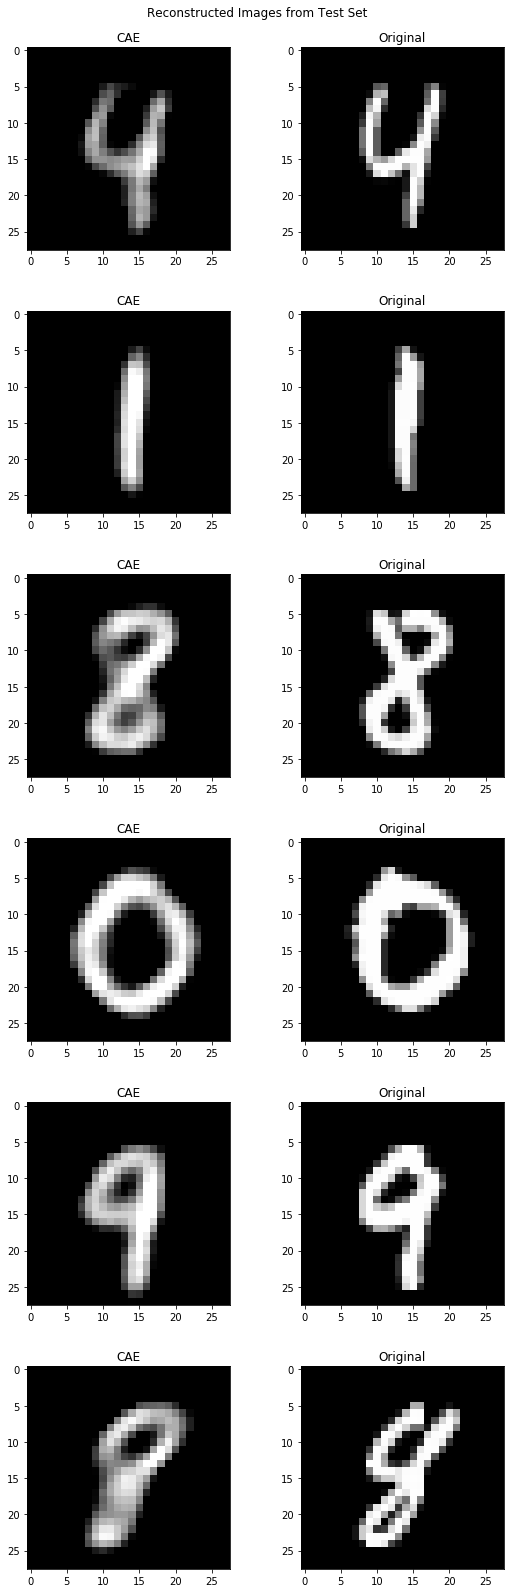

In [56]:
fig, ax = plt.subplots(6, 2, figsize = (9, 28))
titles = ['CAE','Original']
reconstructions = [cae_recons_x_test, x_test_reshape]
np.random.seed(1103)
rand_ints = np.random.choice(range(n_obs_test), 6, replace = 0)
for row in range(6):
    for col in range(2):
        ax[row, col].set(title = titles[col])
        ax[row, col].imshow(reconstructions[col][rand_ints[row]].reshape(width, height), cmap = 'gray')

plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Reconstructed Images from Test Set', y = 0.9);


The reconstruction seems to be the best one yet. Like the dense autoencoder, it captures the 0s and 1s very well but unlike the dense autoencoder it is able to distinguish the first 4 from a 9. That said, it is still not perfect; for instance, it struggles to identify the last image, an 8. 

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [57]:
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
mse_x_test = mse(x_test.reshape(-1, width*height), cae_recons_x_test.reshape(-1, width*height)).numpy()


In [58]:
cae_recons_x_cs109b = cae(x_cs109b.reshape(-1, width, height, 1)).numpy()
mse_x_cs109b = mse(x_cs109b.reshape(-1, width*height), cae_recons_x_cs109b.reshape(-1, width*height)).numpy()


**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


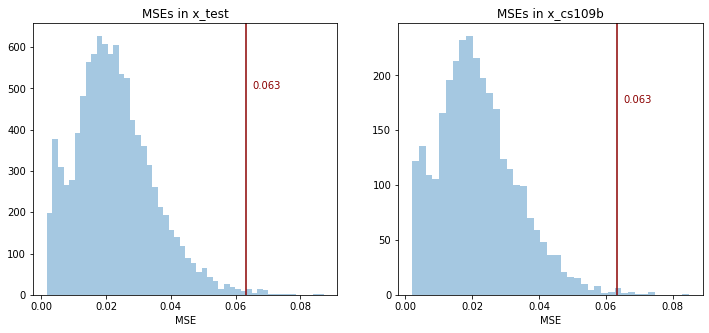

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
sns.distplot(mse_x_test, kde = False, ax = ax[0])
sns.distplot(mse_x_cs109b, kde = False, ax = ax[1])
q = 0.995
threshold = np.quantile(mse_x_cs109b, q)
ax[0].set(xlabel = 'MSE', title = 'MSEs in x_test')
ax[0].axvline(threshold, c = 'darkred')
ax[0].text(threshold + 0.002, 500, str(round(threshold, 3)), c = 'darkred');
ax[1].set(xlabel = 'MSE', title = 'MSEs in x_cs109b')
ax[1].axvline(threshold, c = 'darkred')
ax[1].text(threshold + 0.002, 175,  str(round(threshold, 3)), c = 'darkred');


In [83]:
print(f'images beyond threshold in x_cs109b: {sum(mse_x_cs109b > threshold)}')


images beyond threshold in x_cs109b: 16


The histograms definitely look like they are coming from similar distributions. We look for a threshold where the denstiy of MSEs from `x_cs109b` appears to be greater than the density of MSEs from `x_test`. This is a little higher than 0.06, where there is a small bump in the density for `x_cs109b` MSEs (but not for `x_test` MSEs). We choose the 99.5th quantile of the `x_cs109b` distribution, which is around 0.063. This gives us just 16 images to manually inspect.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

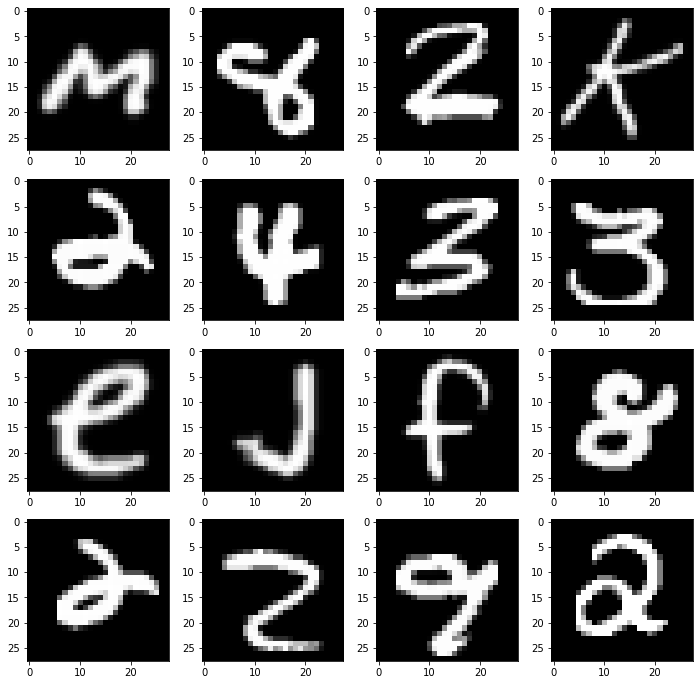

In [86]:
high_mse = mse_x_cs109b[mse_x_cs109b > threshold]
high_mse_indices = np.argwhere(mse_x_cs109b > threshold).reshape(1,-1)[0]
high_mse_indices_sorted = high_mse_indices[high_mse.argsort()[::-1]]

fig, axes = plt.subplots(4, 4, figsize = (12, 12))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x_cs109b[high_mse_indices_sorted[i]], cmap = 'gray');


In [88]:
indices = high_mse_indices_sorted[[0,3,8,9,10]]
pd.DataFrame(dict(letter = ['m','k','e','j','f'],
                 index = indices))

,letter,index
0,m,2989
1,k,827
2,e,1995
3,j,1545
4,f,2954


We are able to detect 5 letters in the first 16 images. 